   # An example of simple analysis of syringes parameters.





### Program demonstrate quality differences between using *Original Perfusor Syringe (OPS)* and others, not recommended syringes in syringe infusion pumps.


   Data obtained from **infusion syringe pumps** are stored in text files and contain the values of a lot of
various parameters. This program only reads  relative pressure, current time and rate of infusion, but it's enough 
to show these differences.
   By analyzing curves **time-pressure** and **time-speed** for OPS and non-original syringes, there are the following risks when using non-original syringe:

- **Non-instant infusion start**
- **High occlusion risks**
- **Large pressure variations during infusion indicating inadequate quality of manufacture syringes are not recommended.**


These cases are demonstrated below.

In [415]:
# %matplotlib inline
import matplotlib.pyplot as plt
import datetime
from matplotlib import dates
import matplotlib.dates as mdates


In [416]:
def read_data(filefame):
    
    """ Reads infusion data, return list of 5 lists:
    
    timelist -- list of datetime.datetime values
    rate_1, rate_2 -- lists of rate values on both syringes 
    pressure_1, pressure_2 -- lists of relative pressure values (% of occlusion value)

    Keyword arguments:
    filename -- file in current directory with data
    
    
    """
      
    f= open(filefame,'r')
    pressure_1 = []
    pressure_2 = []
    rate_1 = []
    rate_2 = []
    timelist = []
    for line in f:
        pump_exists_1 = line.rfind("INSERNUM,170197")
        pump_exists_2 = line.rfind("INSERNUM,13482")

        if pump_exists_1 != -1:
            pres_pos_start = line.find("INP2") + 5
            pres_pos_end = pres_pos_start + line[pres_pos_start:].find('<')  
            curr_pres = line[pres_pos_start:pres_pos_end]
            pressure_1.append(curr_pres)

            time_pos_start = line.find(",TIME,") + 6
            time_pos_end = time_pos_start + line[time_pos_start:].find('<')
            curr_time = line[time_pos_start:time_pos_end]
            timelist.append(curr_time)

            rate_pos_start = line.find(",INRT,") + 6
            rate_pos_end = rate_pos_start + line[rate_pos_start:].find('<')  
            curr_rate = line[rate_pos_start:rate_pos_end]
            rate_1.append(curr_rate)

        if pump_exists_2 != -1:
            pres_pos_start = line.find("INP2") + 5
            pres_pos_end = pres_pos_start + line[pres_pos_start:].find('<')  
            curr_pres = line[pres_pos_start:pres_pos_end]
            pressure_2.append(curr_pres)

            rate_pos_start = line.find(",INRT,") + 6
            rate_pos_end = rate_pos_start + line[rate_pos_start:].find('<')  
            curr_rate = line[rate_pos_start:rate_pos_end]
            rate_2.append(curr_rate)
            
    f.close()    
    timelist = [time[:2] + ':' + time[2:4] + ':' + time[4:] for time in timelist]
    converted_times = map(datetime.datetime.strptime, timelist, len(timelist)*['%H:%M:%S'])
    timelist = (converted_times)
    
    return timelist, rate_1, rate_2, pressure_1, pressure_2

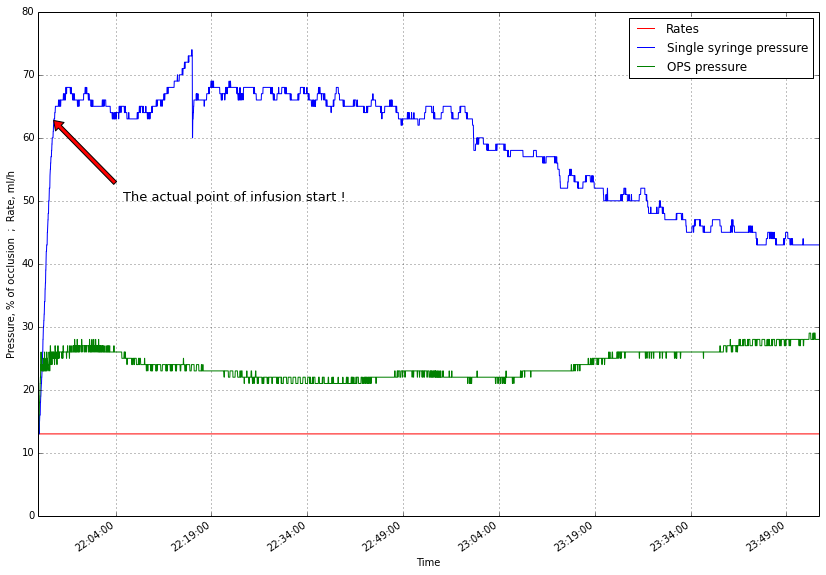

In [417]:
X = read_data("syr_types_Continious.txt")   

plt.figure(figsize=(14,10))  
plt.plot( X[0][:7000], X[1][:7000], 'r', )
plt.plot( X[0][:7000], X[3][:7000], 'b' )
plt.plot( X[0][:7000], X[4][:7000], 'g' )
plt.xlabel('Time') 
plt.ylabel('Pressure, % of occlusion  ;  Rate, ml/h') 
plt.legend(('Rates','Single syringe pressure ','OPS pressure'),loc = 'best')
plt.annotate('The actual point of infusion start ! ', 
             xy=(mdates.date2num(X[0][70]), 64),  
             xytext=(mdates.date2num(X[0][750]), 50),
             textcoords='data',
             arrowprops=dict(facecolor='red', shrink=0.1),
             fontsize=13)
plt.grid()

ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=35)

In [418]:
X = read_data("syr_types_Interbolus.txt")  

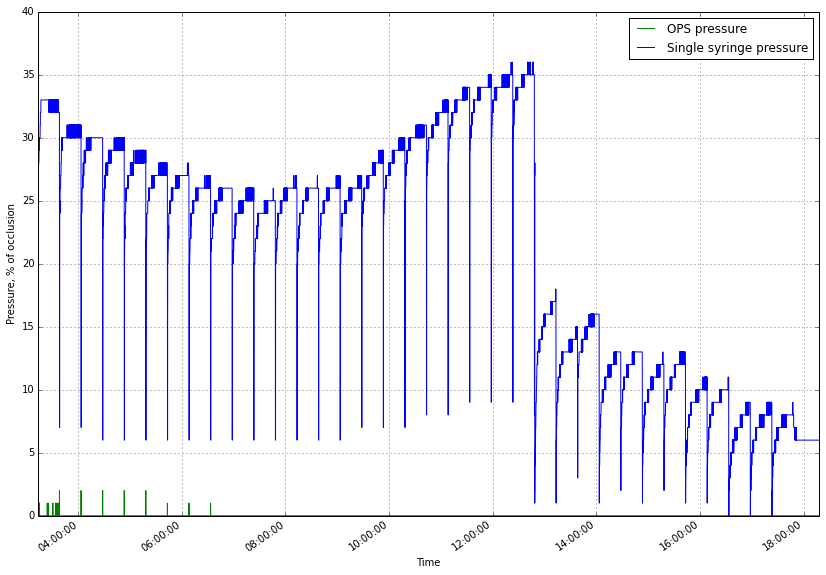

In [419]:
plt.figure(figsize=(14,10))  
plt.plot( X[0],X[3],'g' )
plt.plot( X[0],X[4],'b' )
plt.xlabel('Time') 
plt.ylabel('Pressure, % of occlusion') 
plt.legend(('OPS pressure','Single syringe pressure'),loc = 'best')
plt.grid()

ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=35)

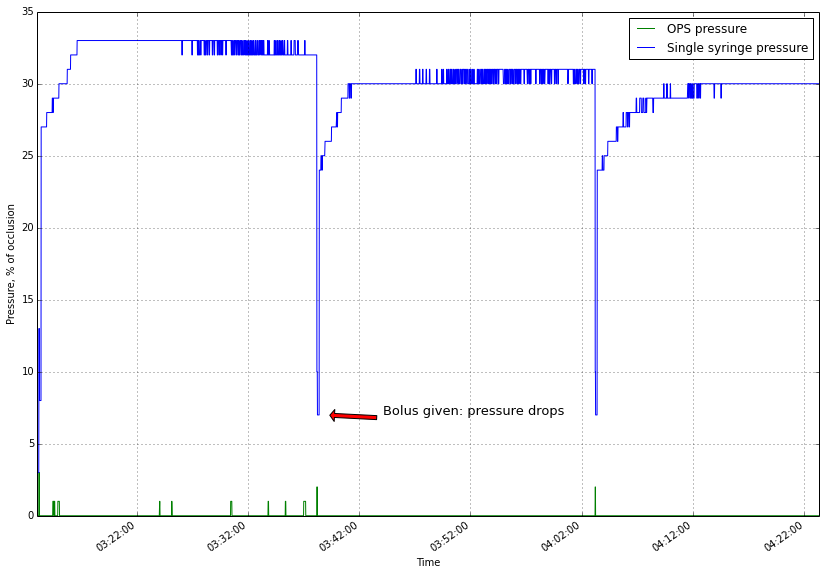

In [420]:
 
plt.figure(figsize=(14,10))  

plt.plot( X[0][:4000], X[3][:4000], 'g' )
plt.plot( X[0][:4000], X[4][:4000], 'b' )
plt.xlabel('Time') 
plt.ylabel('Pressure, % of occlusion') 
plt.legend(('OPS pressure','Single syringe pressure'),loc = 'best')
plt.grid()
plt.annotate('Bolus given: pressure drops', 
             xy=(mdates.date2num(X[0][1450]), 7),  
             xytext=(mdates.date2num(X[0][1750]), 7),
             textcoords='data',
             arrowprops=dict(facecolor='red', shrink=0.1),
             fontsize=13)

ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=35)

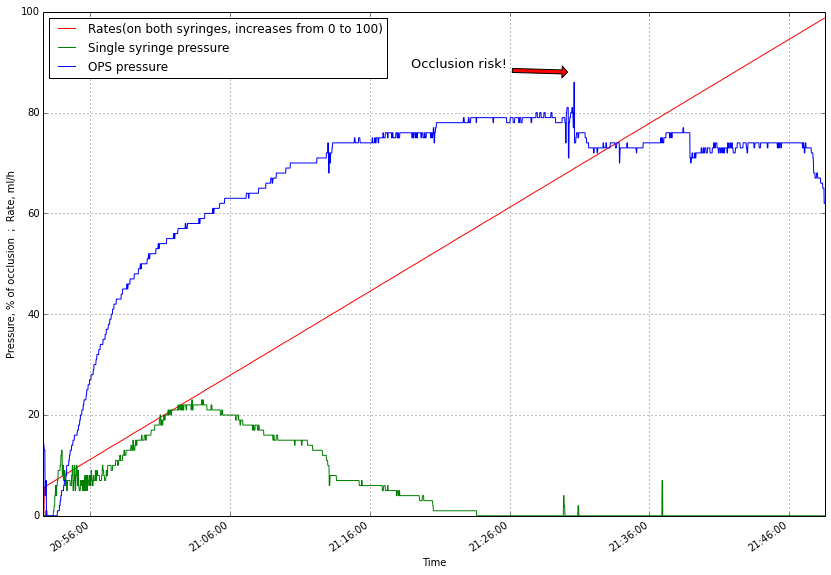

In [421]:
X = read_data("syr_types_RampTaper.txt")   


plt.figure(figsize=(14,10))  
plt.plot( X[0], X[1], 'r')
plt.plot( X[0], X[3], 'g')
plt.plot( X[0], X[4], 'b')
plt.xlabel('Time') 
plt.ylabel('Pressure, % of occlusion  ;  Rate, ml/h') 
plt.legend(('Rates(on both syringes, increases from 0 to 100)',
            'Single syringe pressure ','OPS pressure'),loc = 'best')
plt.annotate('Occlusion risk!', 
             xy=(mdates.date2num(X[0][2100]), 88),  
             xytext=(mdates.date2num(X[0][1450]), 89),
             textcoords='data',
             arrowprops=dict(facecolor='red', shrink=0.1),
             fontsize=13)
plt.grid()

ax = plt.gcf().axes[0]
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate(rotation=35)